In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# 座標データを読み込み
b = np.loadtxt('C:\\Users\\ku-admin\\Desktop\\blender-windows64\\output_pineapple.txt')

# 座標情報の整数化
vertex_all = np.round(b[:, 0:3])
vertex_color_all = np.append(vertex_all, b[:, 3:6], axis=1)

# pandas DataFrameに変換して重複する座標を削除
df = pd.DataFrame(vertex_color_all)
df_grouped = df.groupby(df.iloc[:, 0:3].apply(tuple, axis=1)).first()
vertex_color = df_grouped.values

# 色情報を0-255の範囲に正規化
colors_seikika = vertex_color[:, 3:6]
colors = colors_seikika * 255
colors = np.round(colors)

# vertex_colorをtxtファイルに出力
vertex_color[:,3:6] = colors
vertex_color = vertex_color.astype(np.int32)
print(vertex_color.shape)
np.savetxt('C:\\Users\\ku-admin\\Desktop\\game\\DCT-keiro\\output_vertex.txt', vertex_color[:,0:3], fmt='%d')
np.savetxt('C:\\Users\\ku-admin\\Desktop\\game\\DCT-keiro\\output_vertex_color.txt', vertex_color, fmt='%d')

(36049, 6)


[[ 6.  7.  4.]
 [ 6.  8.  4.]
 [ 7.  8.  4.]
 ...
 [84.  0.  4.]
 [85.  0.  4.]
 [85.  1.  4.]]
0


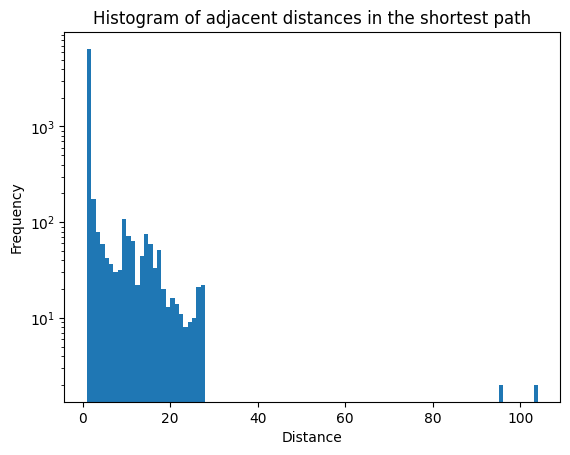

In [10]:
#座標データをまず並べ替える

#命令列長をしらべる(まだ並べ替えていない)

def calc(distances):
    sum = 0
    for i in range(len(distances)):
        if distances[i] == 1: #距離が１の場合は５ビットでいい
            sum += 5
        else:
            sum += 21 + 5 #距離が１でない場合は５ビットに加えてフルで２１ビット使う
    return sum

#距離を計算
def distance(x, y):
    diff = np.empty((3,))
    diff[0] = np.abs(x[0] - y[0])
    diff[1] = np.abs(x[1] - y[1])
    diff[2] = np.abs(x[2] - y[2])
    max_diff = np.max(diff)
    return max_diff

# ヒストグラムをプロットする関数
def plot_histogram(distances):
    # ヒストグラムを表示
    plt.hist(distances, bins=np.arange(min(distances), max(distances) + 1))
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.yscale('log')  # 追加：縦軸をlogスケールに変更
    plt.title('Histogram of adjacent distances in the shortest path')
    plt.show()

b = np.loadtxt('C:\\Users\\ku-admin\\Desktop\\game\\DCT-keiro\\path_output_zahyou.txt')
print(b)
b = np.unique(b, axis=0)
distances = []
a = 0
for i in range(b.shape[0]-1):
    if np.array_equal(b[i],b[i+1]):a+=1
    dist = distance(b[i], b[i+1])
    distances.append(dist)
print(a)
plot_histogram(distances)



#1から書いたほうが速い

In [12]:
def read_path_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        path = [int(line.strip()) for line in lines]
    return path

#これでちゃんと座標を順番に取り出せる、あとは一致する色をくっつければ、目的は達成
coordinates = np.loadtxt('output_vertex.txt')
filename = "path_output.txt"
path = read_path_from_file(filename)
print("頂点数")
print(len(path))
for i in range(100):
    print(coordinates[path[i]])

頂点数
36049
[  6.  47. 104.]
[  6.  48. 104.]
[  7.  48. 104.]
[  7.  47. 104.]
[  7.  46. 104.]
[  8.  46. 104.]
[  8.  47. 104.]
[  8.  48. 104.]
[  9.  48. 104.]
[  9.  47. 104.]
[  9.  46. 104.]
[ 10.  46. 104.]
[ 10.  47. 104.]
[ 10.  48. 104.]
[ 11.  48. 104.]
[ 11.  47. 104.]
[ 11.  46. 104.]
[ 11.  45. 104.]
[ 12.  45. 104.]
[ 12.  46. 104.]
[ 12.  46. 103.]
[ 12.  47. 103.]
[ 12.  47. 104.]
[ 12.  48. 104.]
[ 12.  49. 104.]
[ 13.  49. 104.]
[ 13.  48. 104.]
[ 13.  47. 104.]
[ 13.  46. 104.]
[ 13.  45. 104.]
[ 14.  45. 104.]
[ 14.  44. 104.]
[ 15.  44. 104.]
[ 15.  45. 104.]
[ 15.  45. 103.]
[ 14.  45. 103.]
[ 14.  46. 103.]
[ 13.  46. 103.]
[ 13.  47. 103.]
[ 13.  48. 103.]
[ 14.  48. 103.]
[ 14.  47. 103.]
[ 14.  47. 104.]
[ 14.  46. 104.]
[11. 42. 95.]
[12. 42. 95.]
[12. 41. 95.]
[13. 41. 95.]
[13. 42. 95.]
[13. 43. 95.]
[14. 43. 95.]
[14. 42. 95.]
[14. 41. 95.]
[15. 41. 95.]
[15. 42. 95.]
[15. 43. 95.]
[16. 43. 35.]
[16. 42. 35.]
[16. 41. 35.]
[16. 41. 34.]
[16. 41. 33.]
[16.

In [ ]:
#output_vertexを並べ替えC++
#対応する色をくっつける